![image](https://miro.medium.com/max/1400/1*QhIXsDBEnANLXMA0yONxxA.png)

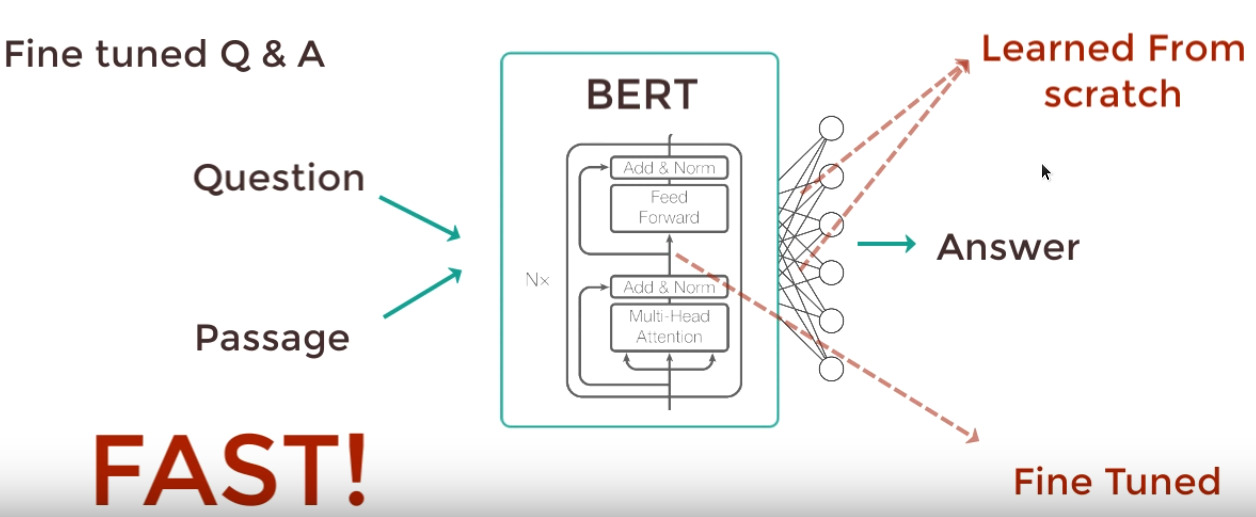

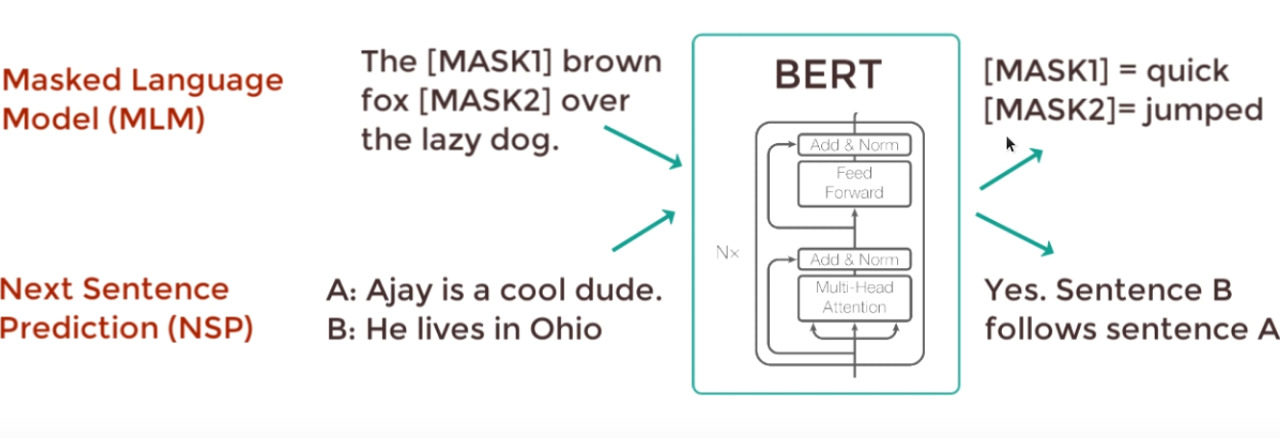

In [ ]:
!pip install simpletransformers

In [ ]:
import json
with open(r"train.json", "r") as read_file:
    train = json.load(read_file)

In [ ]:
train

In [ ]:
with open(r"test.json", "r") as read_file:
    test = json.load(read_file)

In [ ]:
test

In [ ]:
import logging

from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [ ]:
model_type="bert"
model_name= "bert-base-cased"
if model_type == "bert":
    model_name = "bert-base-cased"

elif model_type == "roberta":
    model_name = "roberta-base"

elif model_type == "distilbert":
    model_name = "distilbert-base-cased"

elif model_type == "distilroberta":
    model_type = "roberta"
    model_name = "distilroberta-base"

elif model_type == "electra-base":
    model_type = "electra"
    model_name = "google/electra-base-discriminator"

elif model_type == "electra-small":
    model_type = "electra"
    model_name = "google/electra-small-discriminator"

elif model_type == "xlnet":
    model_name = "xlnet-base-cased"

In [ ]:
# Configure the model 
model_args = QuestionAnsweringArgs()
model_args.train_batch_size = 16
model_args.evaluate_during_training = True
model_args.n_best_size=3
model_args.num_train_epochs=5


In [ ]:
### Advanced Methodology
train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"outputs/{model_type}",
    "best_model_dir": f"outputs/{model_type}/best_model",
    "evaluate_during_training": True,
    "max_seq_length": 128,
    "num_train_epochs": 5,
    "evaluate_during_training_steps": 1000,
    "wandb_project": "Question Answer Application",
    "wandb_kwargs": {"name": model_name},
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":3
    # "use_early_stopping": True,
    # "early_stopping_metric": "mcc",
    # "n_gpu": 2,
    # "manual_seed": 4,
    # "use_multiprocessing": False,
    "train_batch_size": 128,
    "eval_batch_size": 64,
    # "config": {
    #     "output_hidden_states": True
    # }
}

In [ ]:
model = QuestionAnsweringModel(
    model_type,model_name, args=train_args
)

In [ ]:
### Remove output folder
!rm -rf outputs

In [ ]:
# Train the model
model.train_model(train, eval_data=test)

In [ ]:
# Evaluate the model
result, texts = model.eval_model(test)

In [ ]:
# Make predictions with the model
to_predict = [
    {
        "context": "Vin is a Mistborn of great power and skill.",
        "qas": [
            {
                "question": "What is Vin's speciality?",
                "id": "0",
            }
        ],
    }
]

In [ ]:
answers, probabilities = model.predict(to_predict)

print(answers)